In [36]:
import numpy as np
import cv2 as cv
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import pandas as pd

In [2]:
# --- Data Loading and Preprocessing ---
dataset_path = "./Data/UCMerced_LandUse/Images"  # Replace with the path to your dataset
categories = os.listdir(dataset_path)
images = []
labels = []

for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        img = cv.imread(image_path)
        if img is not None: # Check if image was loaded correctly
            images.append(img)
            labels.append(i)

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

In [4]:
# --- Deep Feature Extraction (VGG16) ---
vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

def extract_vgg16_features(image, model):
    img = cv.resize(image, (224, 224)) # VGG16 input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.keras.applications.vgg16.preprocess_input(img)  # Preprocess image
    features = model.predict(img)
    features = features.flatten()
    return features


X_train_vgg16_features = [extract_vgg16_features(img, vgg_model) for img in X_train]
X_test_vgg16_features = [extract_vgg16_features(img, vgg_model) for img in X_test]




1/1 [==============================] - 0s 191ms/step


In [5]:
# --- Classifier Training (SVM) ---
svm_vgg16 = SVC(kernel='linear', C=1.0)  # You can adjust kernel and C
svm_vgg16.fit(X_train_vgg16_features, y_train)

SVC(kernel='linear')

In [6]:
# --- Generate Predictions (VGG16) ---
y_pred_vgg16 = svm_vgg16.predict(X_test_vgg16_features)

In [7]:
# --- Performance Evaluation (VGG16) ---
accuracy_vgg16 = accuracy_score(y_test, y_pred_vgg16)
print("VGG16 Accuracy:", accuracy_vgg16)

conf_matrix_vgg16 = confusion_matrix(y_test, y_pred_vgg16)
print("VGG16 Confusion Matrix:")
print(conf_matrix_vgg16)

VGG16 Accuracy: 0.9166666666666666
VGG16 Confusion Matrix:
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 15  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  4  0  0  0  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  2 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

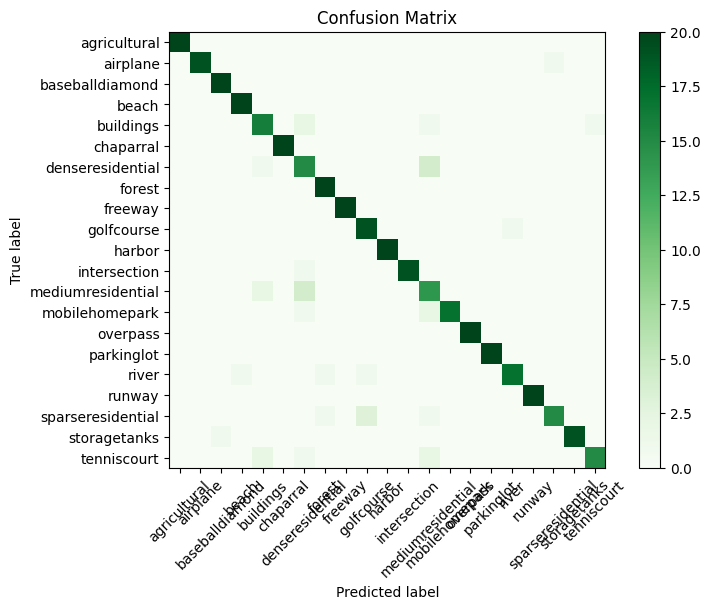

In [8]:
# --- Visualization of Confusion Matrix  ---
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_vgg16, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## ResNet50

In [10]:
# --- Deep Feature Extraction (ResNet50) ---
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_resnet50_features(image, model):
    img = cv.resize(image, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.resnet50.preprocess_input(img)  # ResNet50-specific preprocessing
    features = model.predict(img)
    features = features.flatten()
    return features

X_train_resnet50_features = [extract_resnet50_features(img, resnet_model) for img in X_train]
X_test_resnet50_features = [extract_resnet50_features(img, resnet_model) for img in X_test]

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
1/1 [==============================] - 0s 136ms/step


In [11]:
# --- Classifier Training (SVM - ResNet50) ---
svm_resnet50 = SVC(kernel='linear', C=1.0)  # Adjust kernel and C if needed
svm_resnet50.fit(X_train_resnet50_features, y_train)

SVC(kernel='linear')

In [12]:
# --- Generate Predictions (ResNet50) ---
y_pred_resnet50 = svm_resnet50.predict(X_test_resnet50_features)

In [13]:
# --- Performance Evaluation (ResNet50) ---
accuracy_resnet50 = accuracy_score(y_test, y_pred_resnet50)
print("ResNet50 Accuracy:", accuracy_resnet50)

conf_matrix_resnet50 = confusion_matrix(y_test, y_pred_resnet50)
print("ResNet50 Confusion Matrix:")
print(conf_matrix_resnet50)

ResNet50 Accuracy: 0.9523809523809523
ResNet50 Confusion Matrix:
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  0  0  0  0  0 15  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  1 17  0  0  0  0  0  0  0]
 [ 0  0  0 

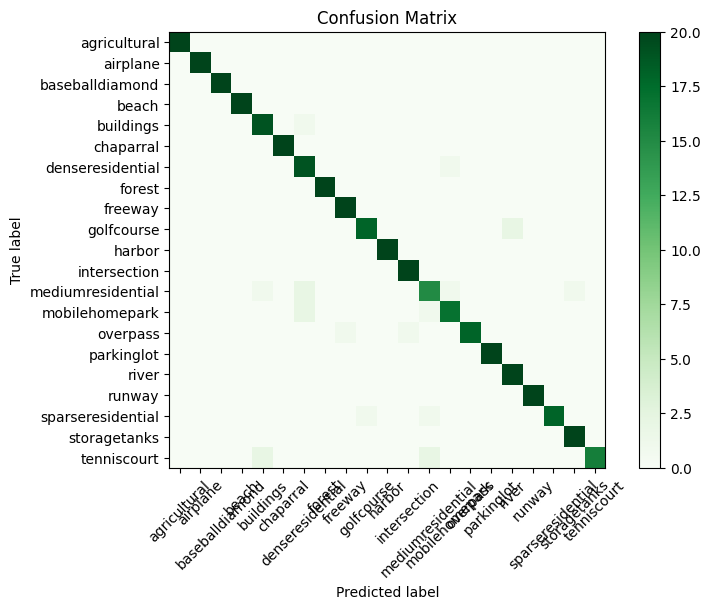

In [14]:
# --- Visualization of Confusion Matrix ---
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_resnet50, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Vision Transformer

In [29]:
# --- Deep Feature Extraction (Vision Transformer - ViT) ---
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.classifier = torch.nn.Identity() # Remove classification head
model.eval()

def extract_vit_features(image):
    image = Image.fromarray(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)  # Get hidden states
    features = outputs.hidden_states[-1]  # Get the last hidden state
    features = features.squeeze(0)
    features = features.mean(dim=0)  # or .flatten() or other method
    return features.numpy()

In [30]:
X_train_vit_features = np.array([extract_vit_features(img) for img in X_train])
X_test_vit_features = np.array([extract_vit_features(img) for img in X_test])  # Convert to NumPy array

In [32]:
# --- Classifier Training (SVM - ViT) ---
svm_vit = SVC(kernel='linear', C=1.0)  # You can adjust kernel and C
svm_vit.fit(X_train_vit_features, y_train)

SVC(kernel='linear')

In [33]:
# --- Generate Predictions (ViT) ---
y_pred_vit = svm_vit.predict(X_test_vit_features)

In [34]:
# --- Performance Evaluation (ViT) ---
accuracy_vit = accuracy_score(y_test, y_pred_vit)
print("ViT Accuracy:", accuracy_vit)

conf_matrix_vit = confusion_matrix(y_test, y_pred_vit)
print("ViT Confusion Matrix:")
print(conf_matrix_vit)

ViT Accuracy: 0.9642857142857143
ViT Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

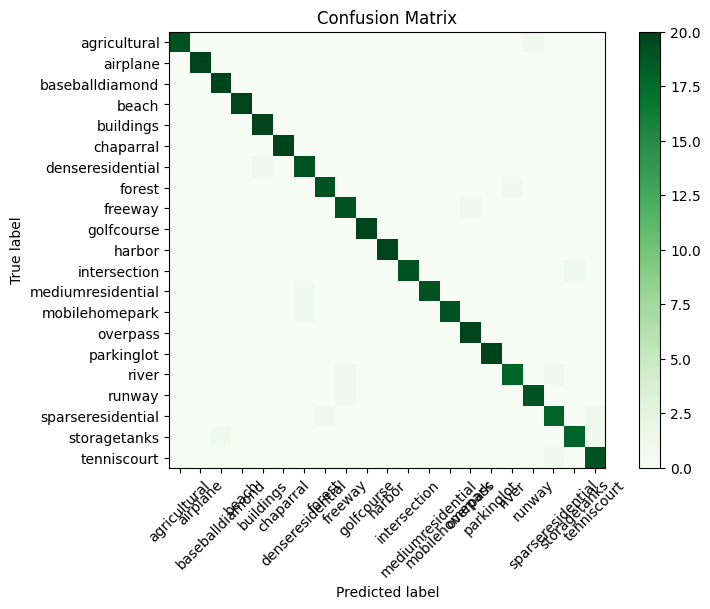

In [35]:
# --- Visualization of Confusion Matrix ---
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_vit, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Comparison

In [42]:
accuracy_sift_kmeans21 = 0.55
conf_matrix_sift_kmeans21= [[17, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [ 0, 11, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0],
 [ 0, 0, 10, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2],
 [ 0, 0, 2, 11, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 0, 0, 0],
 [ 0, 2, 1, 0, 11, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [ 0, 0, 0, 0, 0, 19, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 1, 0, 2, 0, 11, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1],
 [ 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
 [ 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0, 1, 0, 0, 5, 0, 1, 1, 1, 1, 1],
 [ 0, 0, 6, 1, 0, 0, 1, 1, 0, 5, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0],
 [ 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 10, 2, 1, 5, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 13, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [ 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 7, 3, 0, 0, 1, 0, 3, 1, 1],
 [ 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 12, 0, 0, 1, 0, 0, 0, 0],
 [ 0, 0, 0, 1, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 1],
 [ 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 9, 0, 2, 0, 2],
 [ 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 0, 0],
 [ 0, 2, 1, 0, 0, 0, 0, 4, 0, 2, 0, 0, 6, 0, 0, 0, 1, 0, 4, 0, 0],
 [ 0, 0, 3, 0, 6, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4, 0, 0, 0, 1, 2, 0],
 [ 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 4, 0, 1, 0, 0, 0, 1, 0, 8]]
conf_matrix_sift_kmeans21 = np.array(conf_matrix_sift_kmeans21)


Performance Comparison:
           Model  Accuracy
0  SIFT+KMEANS21  0.550000
1          VGG16  0.916667
2       ResNet50  0.952381
3            ViT  0.964286


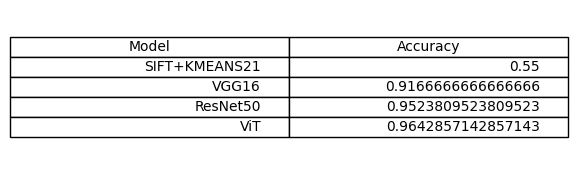

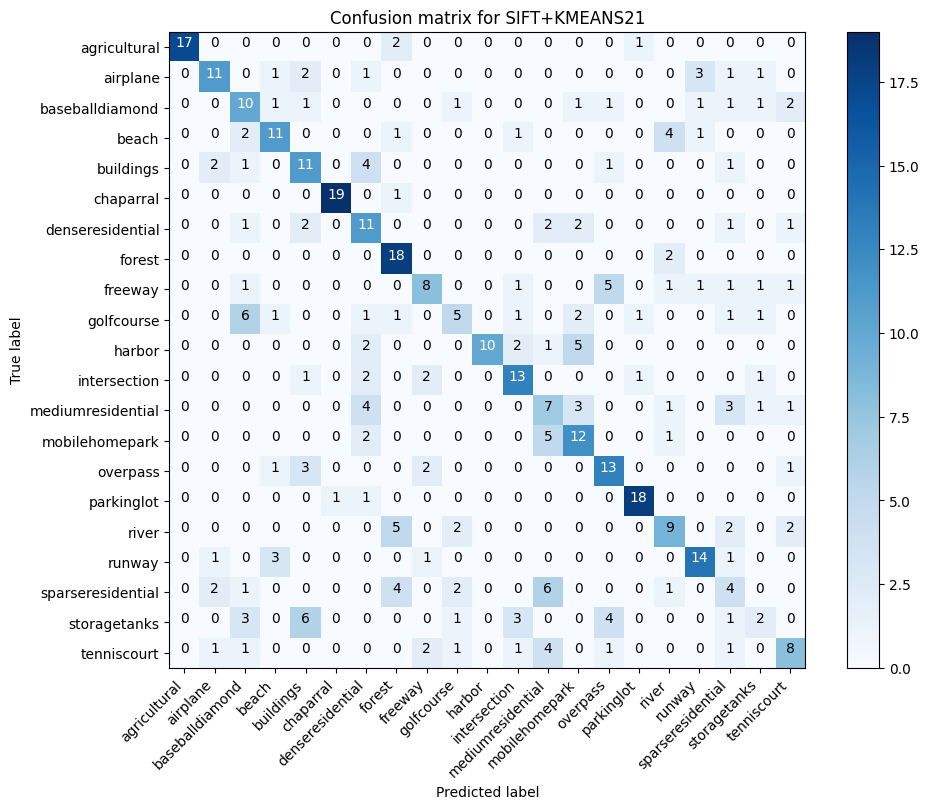

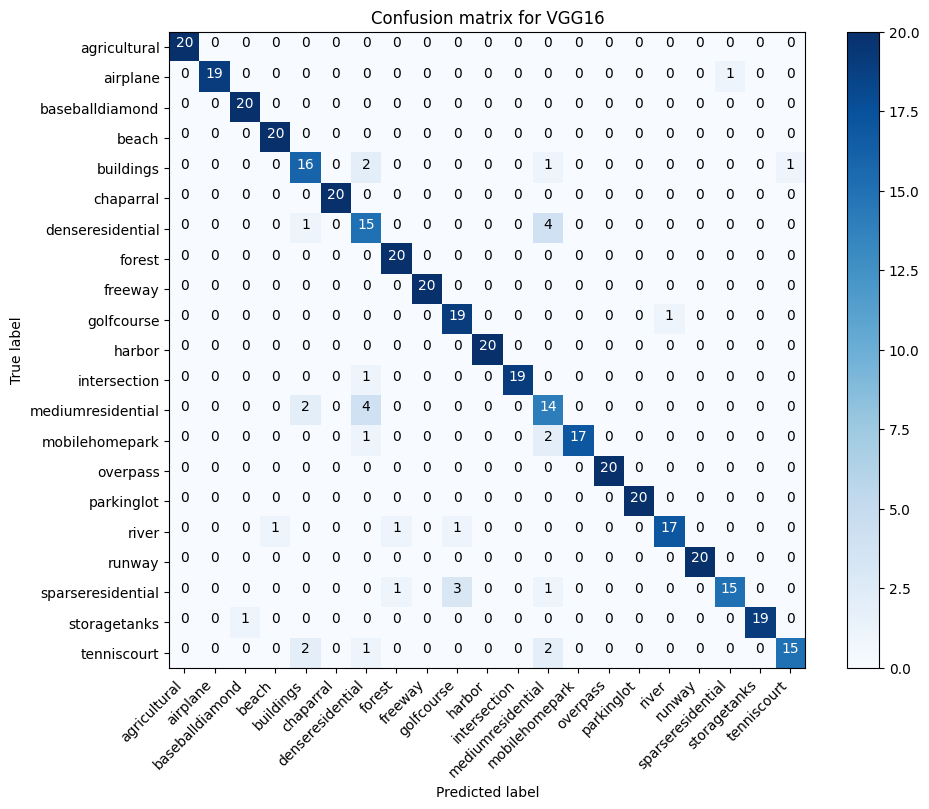

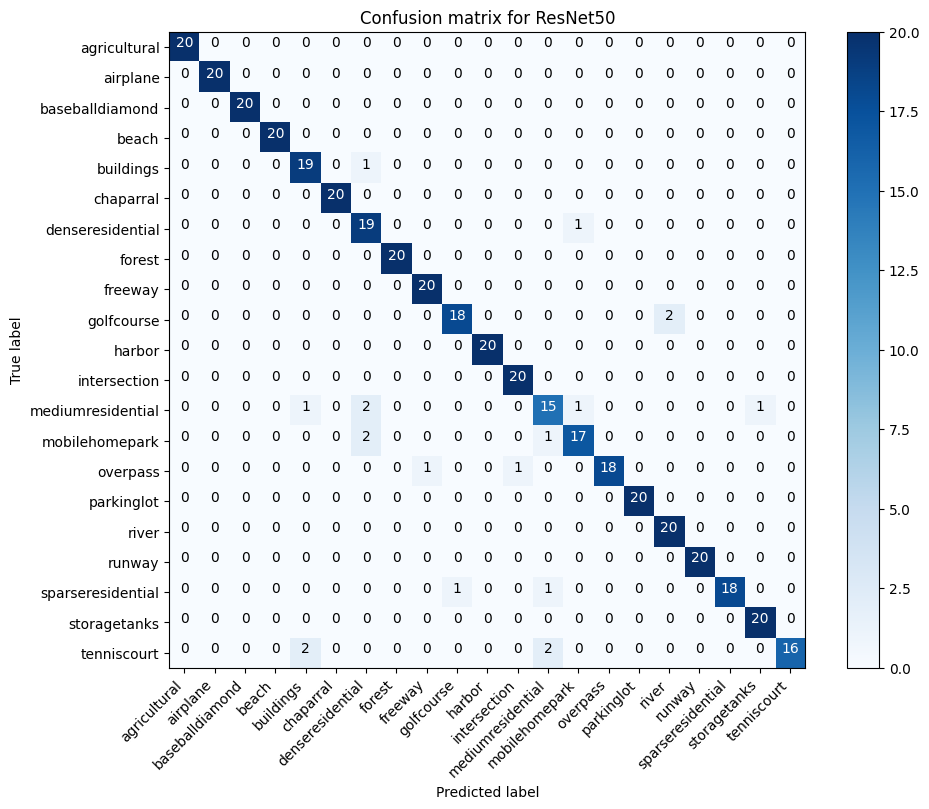

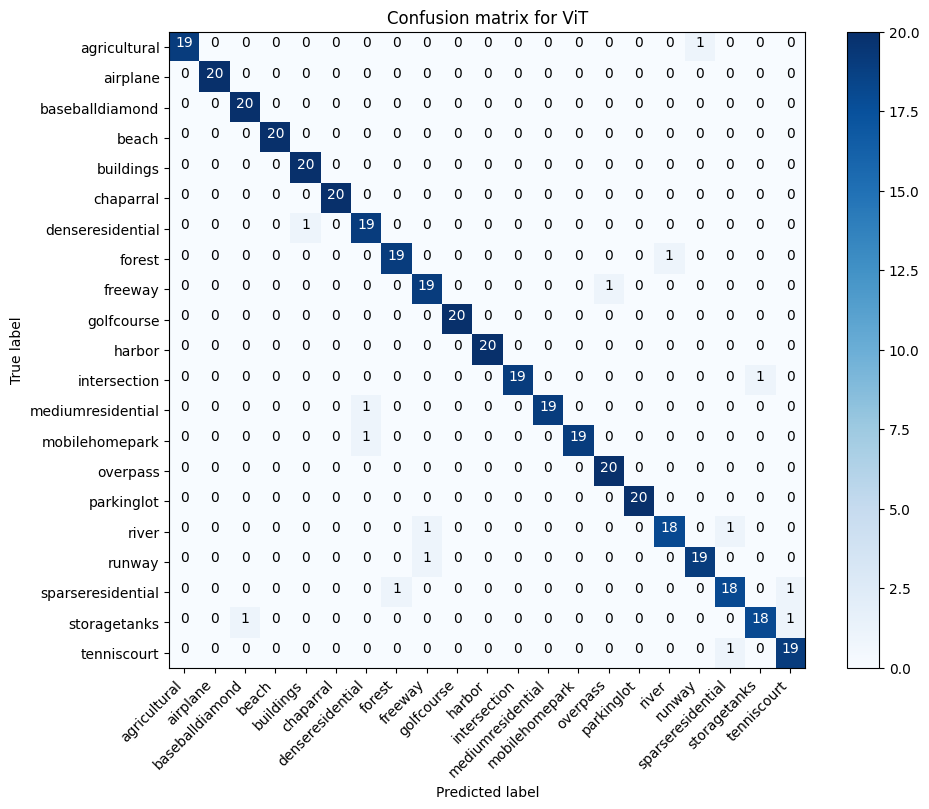

In [43]:
# --- Performance Comparison ---
results = {
    "Model": ["SIFT+KMEANS21" ,"VGG16", "ResNet50", "ViT"],
    "Accuracy": [accuracy_sift_kmeans21, accuracy_vgg16, accuracy_resnet50, accuracy_vit],
}

results_df = pd.DataFrame(results)
print("\nPerformance Comparison:")
print(results_df)

fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figsize as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust fontsize
table.scale(1.2, 1.2) # Adjust scaling 



# --- Confusion Matrix Visualization (Optional) ---

def plot_confusion_matrix(cm, categories, title='Confusion Matrix'):

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45, ha='right')
    plt.yticks(tick_marks, categories)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Annotations inside the heatmap
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")


    plt.show()




import itertools
plot_confusion_matrix(conf_matrix_sift_kmeans21, categories, title='Confusion matrix for SIFT+KMEANS21')
plot_confusion_matrix(conf_matrix_vgg16, categories, title='Confusion matrix for VGG16')
plot_confusion_matrix(conf_matrix_resnet50, categories, title='Confusion matrix for ResNet50')
plot_confusion_matrix(conf_matrix_vit, categories, title='Confusion matrix for ViT')